In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
pima = pd.read_csv("dibatics_dataset_DecTree.csv")

In [4]:
pima.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


In [5]:
pima.shape

(768, 9)

# Analyze Dataset

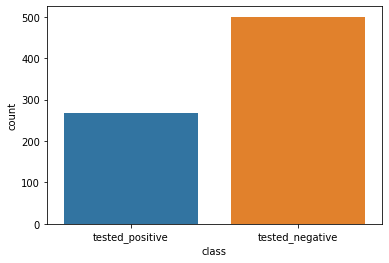

In [6]:
sns.countplot("class",data=pima)#target cloumn is class

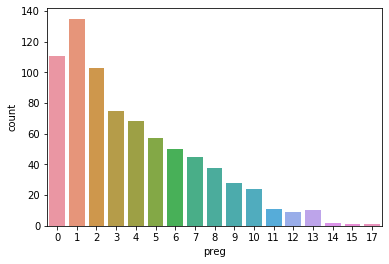

In [7]:
sns.countplot("preg",data=pima)

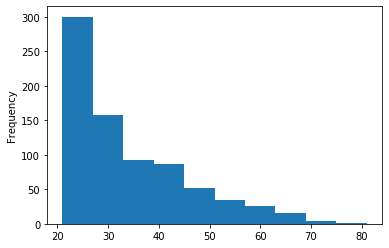

In [8]:
pima["age"].plot.hist()

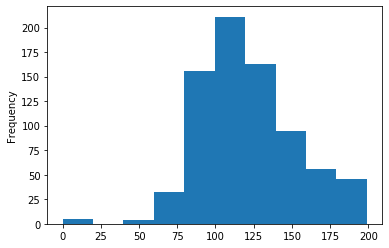

In [9]:
pima["plas"].plot.hist()

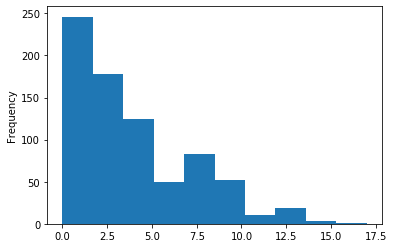

In [10]:
pima["preg"].plot.hist()

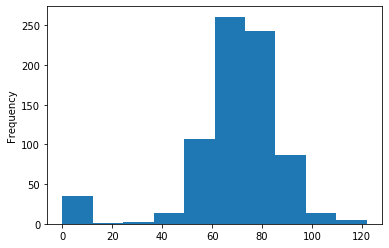

In [11]:
pima["pres"].plot.hist()

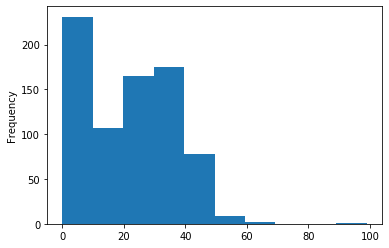

In [12]:
pima["skin"].plot.hist()

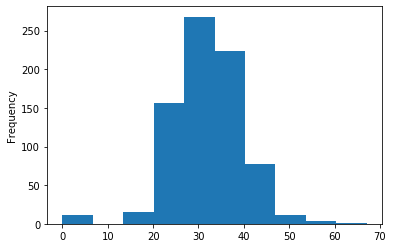

In [13]:
pima["mass"].plot.hist()

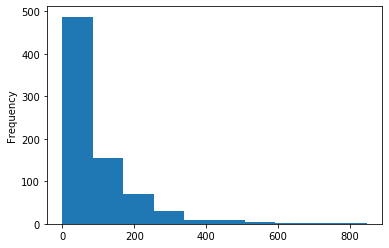

In [14]:
pima["insu"].plot.hist()

# Pairlot

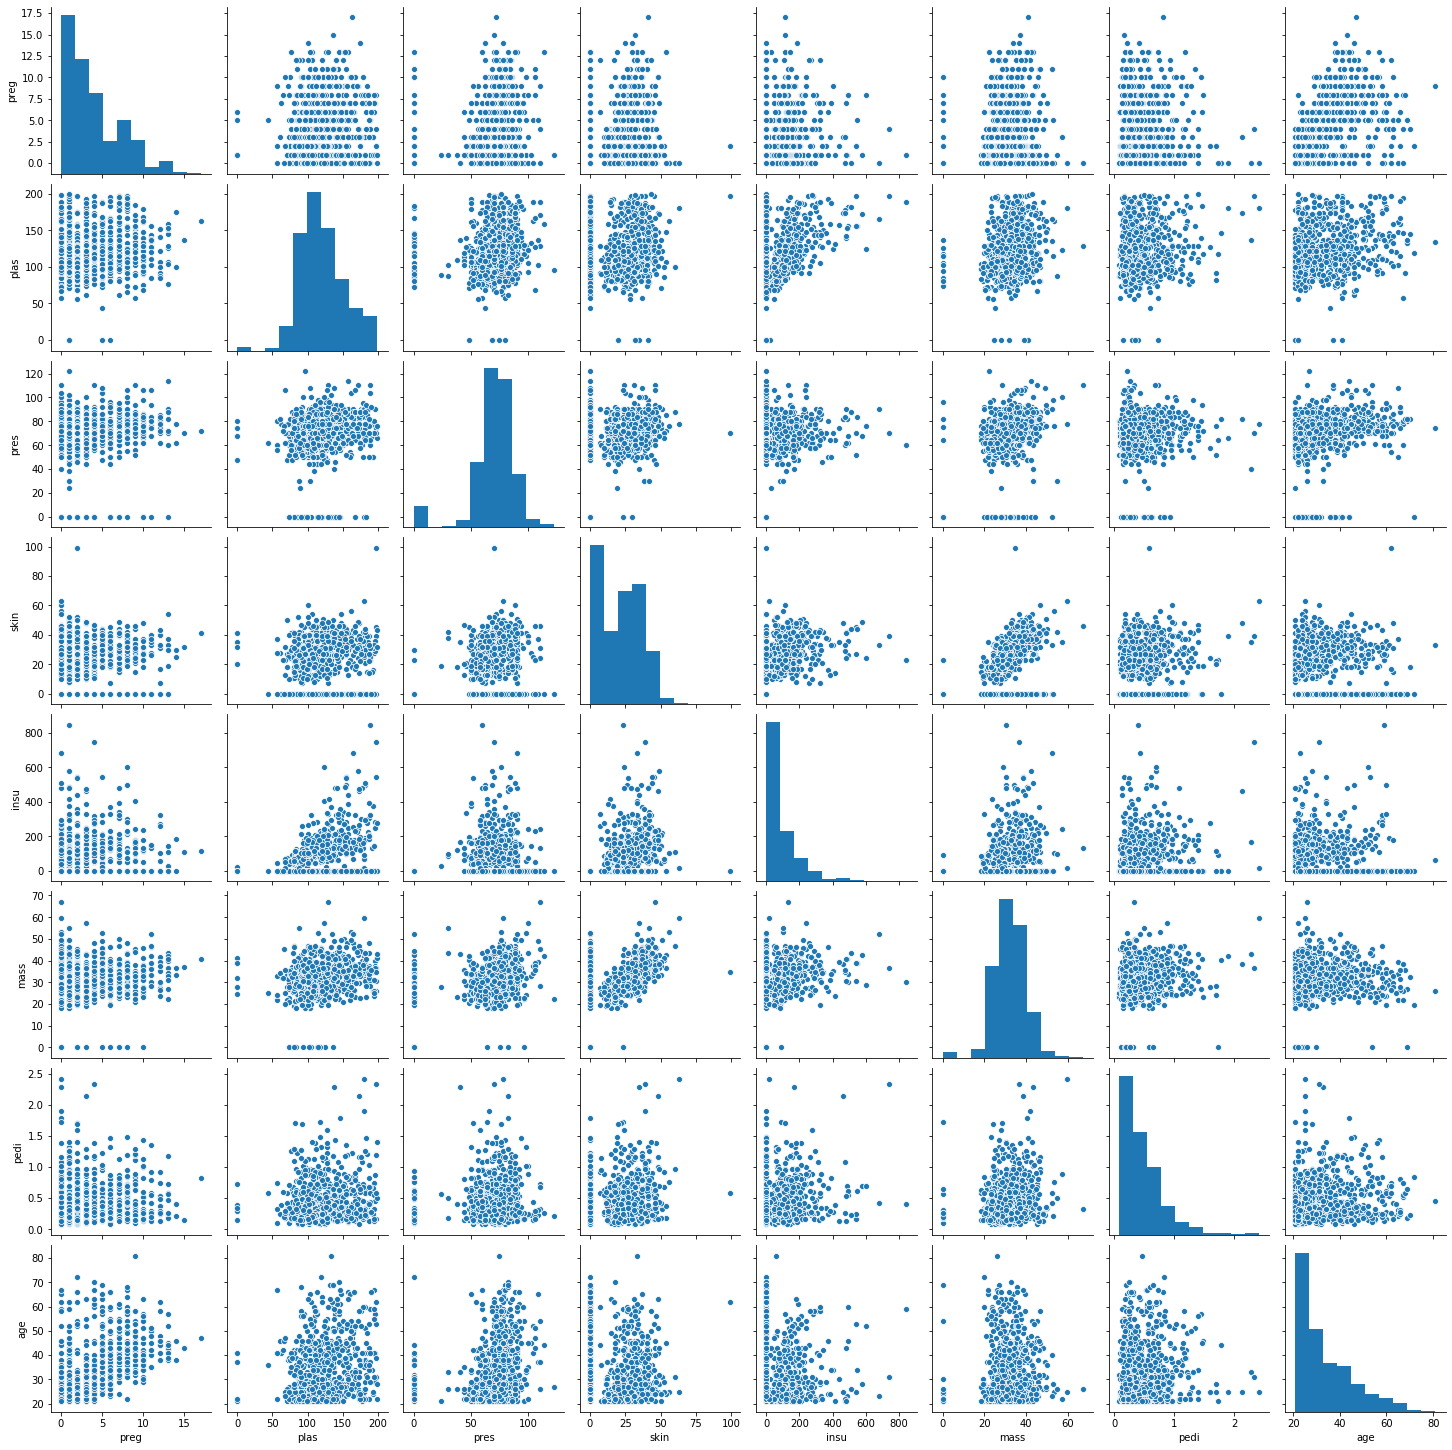

In [15]:
sns.pairplot(pima)

In [16]:
pima.age.unique()

array([50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 34, 57, 59, 51, 27, 41, 43,
       22, 38, 60, 28, 45, 35, 46, 56, 37, 48, 40, 25, 24, 58, 42, 44, 39,
       36, 23, 61, 69, 62, 55, 65, 47, 52, 66, 49, 63, 67, 72, 81, 64, 70,
       68], dtype=int64)

In [17]:
pima.preg.unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14],
      dtype=int64)

# People of age group >50 who suffered dibates

In [18]:
len(pima[(pima["age"] >50)])

81

In [19]:
pima.age.describe()

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: age, dtype: float64

In [20]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   insu    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


# what percent of null value present in each coloumn of dataset

In [21]:
pima.isna().sum()/pima.shape[0]

preg     0.0
plas     0.0
pres     0.0
skin     0.0
insu     0.0
mass     0.0
pedi     0.0
age      0.0
class    0.0
dtype: float64

In [22]:
pima["age"].median()

29.0

In [23]:
pima["age"].mean()

33.240885416666664

# converting every columns in int and float data type

In [24]:
# from sklearn.preprocessing import LabelEncoder
# le_class = LabelEncoder()
# pima['class_n'] = le_class.fit_transform(pima['class'])

In [25]:
pima.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


In [26]:
# pima_n = pima.drop(['class'],axis='columns')

In [27]:
# pima_n.head()

# Drop duplicates Rows

In [28]:
# pimaa=pima_n.drop_duplicates()

# Heatmap

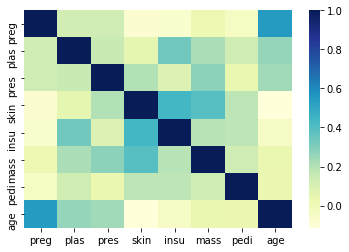

In [29]:
import seaborn as sns
sns.heatmap(pima.corr(), cmap="YlGnBu")

# EDA BoxPlot

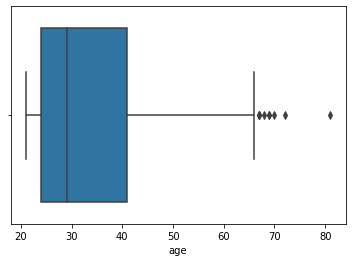

In [30]:
sns.boxplot(pima['age'], data=pima)

# split dataset in features and target variable

In [31]:
#feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age','Glucose','BloodPressure', 
#                'SkinThickness', 'DiabetesPedigreeFunction']

X = pima.drop(["class"], axis=1) # Features
y = pima["class"] # Target variable

In [32]:
y.value_counts()

tested_negative    500
tested_positive    268
Name: class, dtype: int64

In [33]:
X.describe()

,preg,plas,pres,skin,insu,mass,pedi,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


# Split dataset into training set and test set

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=555) # 70% training and 30% test

In [35]:
y_train.value_counts()

tested_negative    340
tested_positive    197
Name: class, dtype: int64

In [36]:
y_test.value_counts()

tested_negative    160
tested_positive     71
Name: class, dtype: int64

In [37]:
# Create Decision Tree classifer object
model = DecisionTreeClassifier()

# Train Decision Tree Classifer
model.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

In [38]:
# Model Accuracy, how often is the classifier correct?
print("test Accuracy:", metrics.accuracy_score(y_test, y_pred))
#gives percentage of y predict value matching with y test value

test Accuracy: 0.7359307359307359


In [39]:
y_pred_train = model.predict(X_train)

In [40]:
print("Train Accuracy:", metrics.accuracy_score(y_pred_train, y_train))

Train Accuracy: 1.0


In [41]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

tested_negative       0.82      0.79      0.81       160
tested_positive       0.56      0.62      0.59        71

       accuracy                           0.74       231
      macro avg       0.69      0.70      0.70       231
   weighted avg       0.74      0.74      0.74       231



# Plot Decision Tree

In [42]:
import os
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
os.environ['PATH'] = os.environ['PATH']+';' + r'C:\Users\Yashpal Verma\anaconda3\Library\bin\graphviz'

C:\Users\Yashpal Verma\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


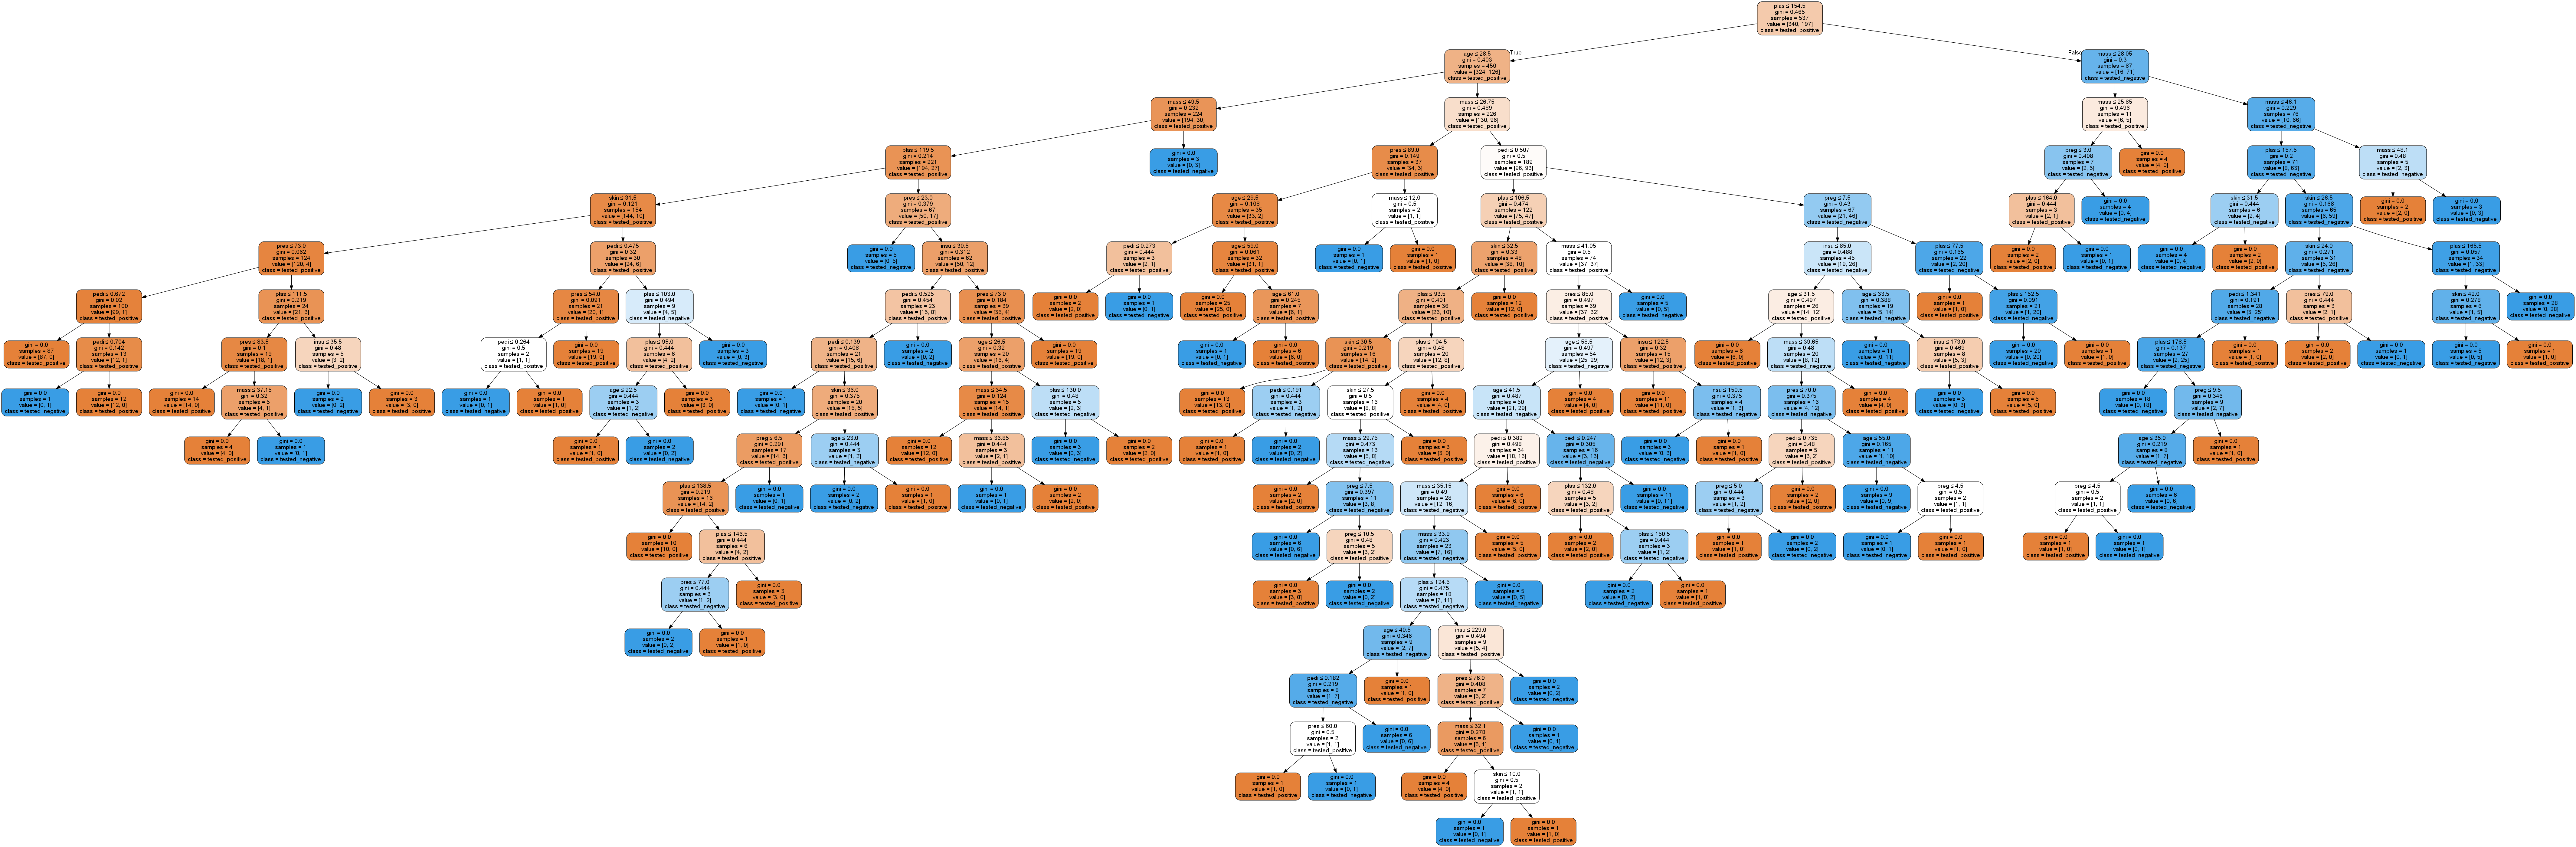

In [43]:
dot_data = StringIO()
export_graphviz(model, 
                out_file=dot_data,  
                filled=True, 
                rounded=True,
                special_characters=True,
                feature_names = X.columns,
                class_names=['tested_positive','tested_negative'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

In [44]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=4)

# Train Decision Tree Classifer
clf.fit(X_train, y_train)

#Predict the response for train dataset
y_pred = clf.predict(X_train)

# Model Accuracy, how often is the classifier correct?
print("Train Accuracy:", metrics.accuracy_score(y_train, y_pred))

#######  Test ##########
y_pred_test = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Test Accuracy:",metrics.accuracy_score(y_test, y_pred_test))

Train Accuracy: 0.8026070763500931
Test Accuracy: 0.7792207792207793


In [45]:
print(classification_report(y_test, y_pred_test))

                 precision    recall  f1-score   support

tested_negative       0.82      0.88      0.85       160
tested_positive       0.67      0.55      0.60        71

       accuracy                           0.78       231
      macro avg       0.74      0.72      0.73       231
   weighted avg       0.77      0.78      0.77       231



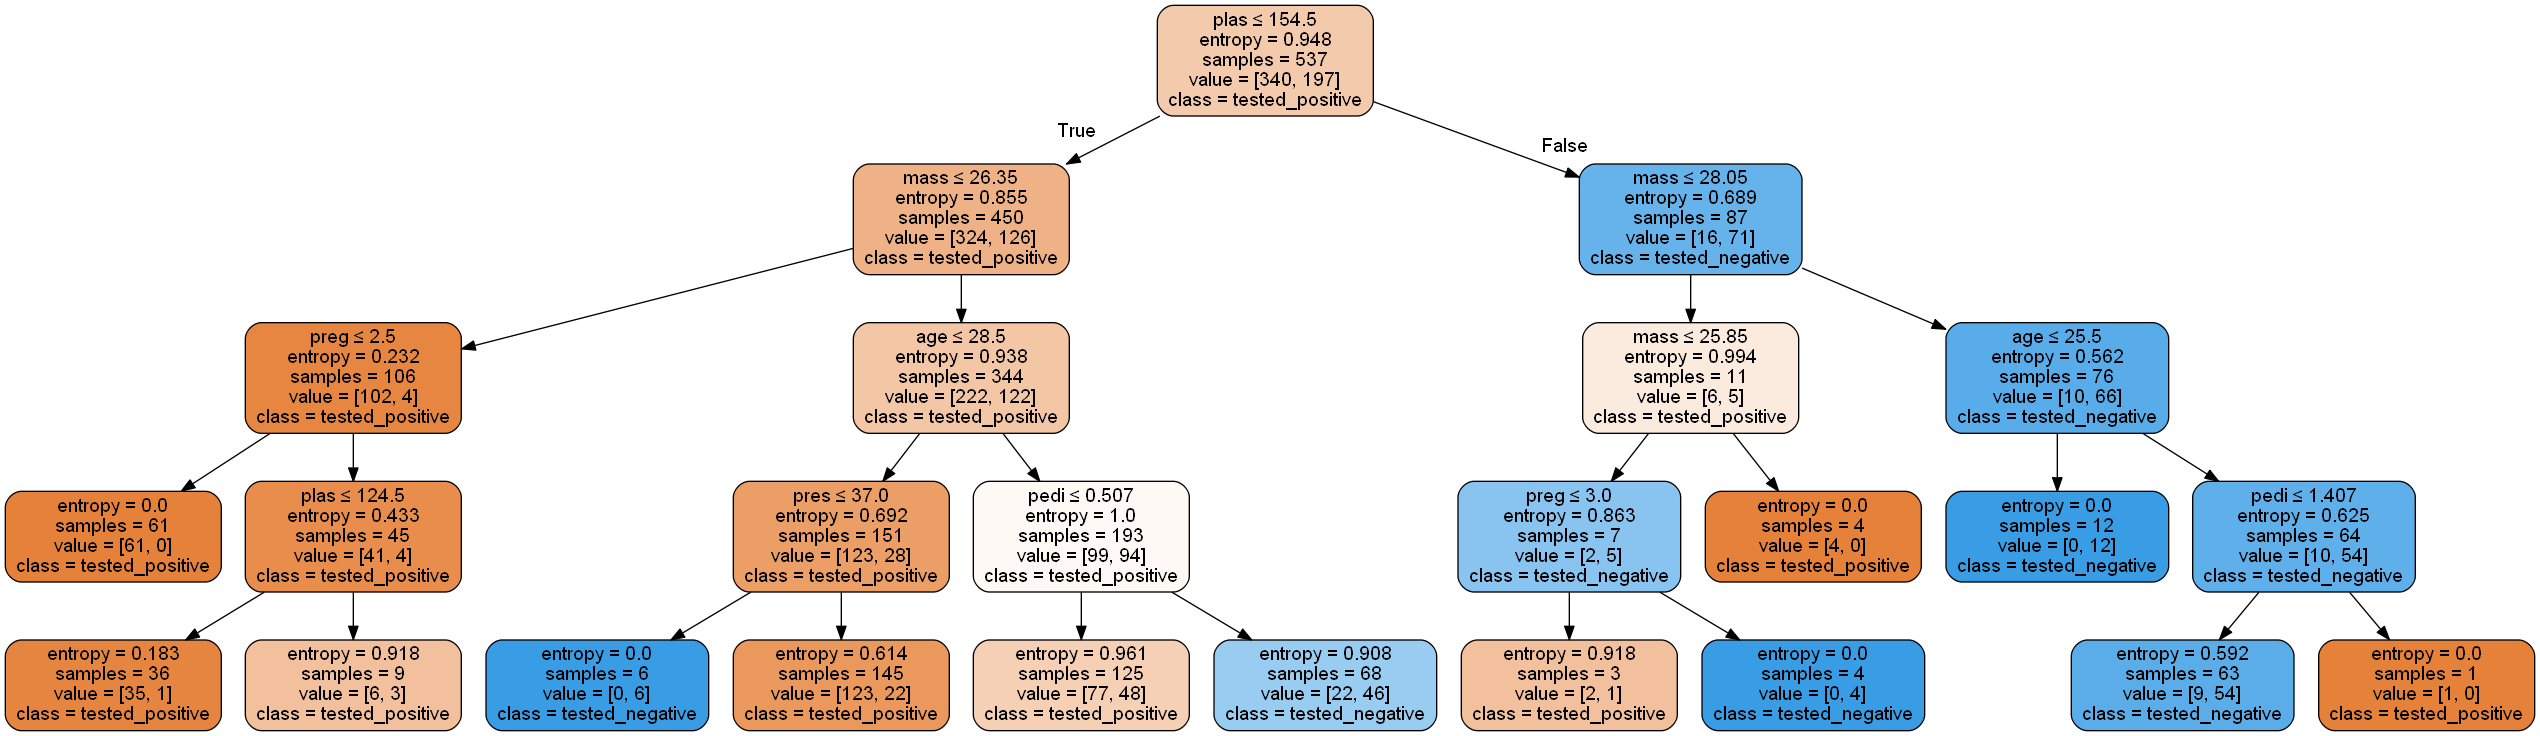

In [46]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = X.columns,
                class_names=['tested_positive','tested_negative'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes_pruned.png')
Image(graph.create_png())

In [47]:
from sklearn.ensemble import RandomForestClassifier
clf_random_forest = RandomForestClassifier(n_estimators=170)
clf_random_forest.fit(X_train, y_train)
y_pred = clf_random_forest.predict(X_test)

print("test Accuracy:",metrics.accuracy_score(y_test, y_pred))

test Accuracy: 0.7835497835497836


In [48]:
from sklearn.svm import SVC
clf_svm = SVC()
clf_svm.fit(X_train, y_train)
y_pred = clf_svm.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7878787878787878


In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=1) # 70% training and 30% test
from sklearn.svm import SVC
clf_svm = SVC(C=5)
clf_svm.fit(X_train, y_train)
y_pred = clf_svm.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7835497835497836


In [50]:
X_train

array([[ 3.31264542,  0.47275805,  0.04624525, ...,  0.64823013,
        -0.96304428,  0.83038113],
       [-1.14185152, -0.74783062, -0.26394125, ...,  0.61015436,
         0.38694877, -0.70119842],
       [-0.84488505, -0.15318486,  0.04624525, ..., -0.58288655,
        -0.80901822, -1.04154944],
       ...,
       [ 2.7187125 ,  0.1597866 ,  1.08020025, ...,  1.44782138,
         0.33560676,  0.74529338],
       [ 0.04601433,  1.56815814,  0.14964075, ...,  1.47320522,
         0.02151441, -0.61611067],
       [ 1.53084665, -0.59134489,  0.35643175, ...,  0.1151693 ,
         0.58325649,  1.08564439]])

In [51]:
from sklearn.linear_model import LogisticRegression
clf_logistic = LogisticRegression()
clf_logistic = clf_logistic.fit(X_train, y_train)
y_pred = clf_logistic.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7835497835497836


In [52]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7142857142857143


In [53]:
from sklearn.ensemble import RandomForestClassifier
clf_random_forest = RandomForestClassifier(n_estimators=170)
clf_random_forest.fit(X_train, y_train)
y_pred = clf_random_forest.predict(X_test)

print("test Accuracy:",metrics.accuracy_score(y_test, y_pred))


test Accuracy: 0.7965367965367965


In [59]:
import pickle
pkl_filename="rf_model.pkl"
with open(pkl_filename,"wb") as file:
    pickle.dump(clf_random_forest,file)

In [60]:
#load from file
with open(pkl_filename,"rb") as file:
    pickle_model=pickle.load(file)

In [61]:
pickle_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=170,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# from sklearn.svm import SVC
# clf_svm=SVC()
# clf_svm.fit(X_train,y_train)
# y_pred=clf.svm.predict(X_test)
# print("Accuracy:",metrics.accuracy_score(y_test, y_pred))